In [12]:
import cmeutils
from cmeutils.sampling import is_equilibrated
from cmeutils.structure import bond_distribution

import matplotlib.pyplot as plt
import numpy as np
import signac
import gsd

In [2]:
project = signac.get_project("../melt-flow/")

f8e72c6b460a12b743ddabae5b55d142


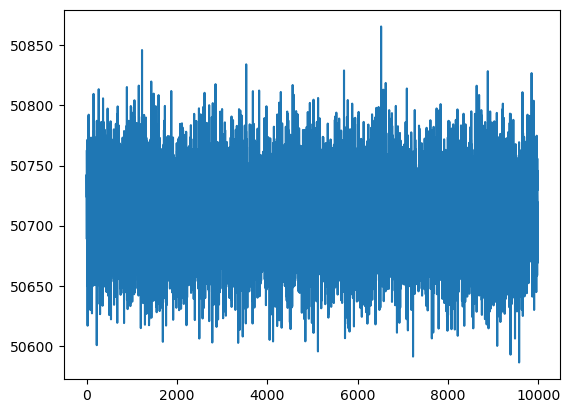

In [22]:
for job in project.find_jobs({"doc.runs": 1}):
    print(job)
    data = np.genfromtxt(job.fn(f"log{job.doc.runs}.txt"), names=True)
    pe = data["mdcomputeThermodynamicQuantitiespotential_energy"]
    pair = data["mdpairLJenergy"]
    bond = data["mdbondFENEWCAenergy"]
    plt.plot(bond[320:])

# Check Average Bond Lengths:

In [16]:
for job in project.find_jobs({"doc.runs": 1}):
    with gsd.hoomd.open(job.fn(f"trajectory{job.doc.runs}.gsd")) as traj:
        n_frames = len(traj)
    bdist = bond_distribution(
        gsd_file=job.fn(f"trajectory{job.doc.runs}.gsd"),
        start=-n_frames//2,
        stop=-1,
        A_name="A",
        B_name="A",
        histogram=True,
    )

516


(0.5, 1.5)

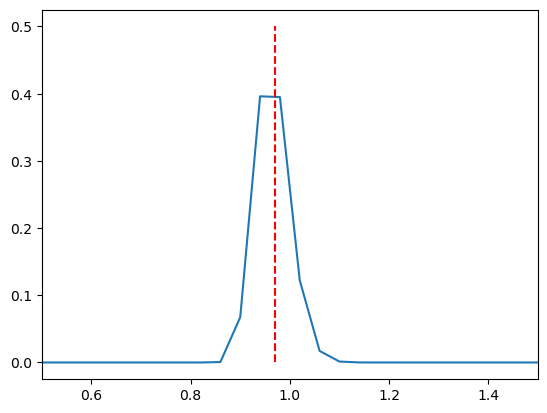

In [17]:
plt.plot(bdist[:,0], bdist[:,1])
plt.vlines(x=0.97, ymin=0, ymax=0.50, linestyle="--", color="r")
plt.xlim(0.5, 1.5)